## Тема “Обучение без учителя”
#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [153]:
# Импортируем нужные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [154]:
# Загружаем датасет Boston House Prices dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Создаем датафремы X и y
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [155]:
# Смотрим X
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [156]:
# Смотрим y
print(y[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [203]:
# Разбиваем датафреймы X и y на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Форма X_train: {X_train.shape}')
print(f'Форма y_train: {y_train.shape}')
print(f'Форма X_test: {X_test.shape}')
print(f'Форма y_test: {y_test.shape}')

Форма X_train: (404, 13)
Форма y_train: (404,)
Форма X_test: (102, 13)
Форма y_test: (102,)


In [206]:
# Масштабируем данные с помощью StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [207]:
# Смотрим отмаштабированные тренировочные признаки
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [208]:
# Смотрим отмаштабированные тестовые признаки
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


In [209]:
# Строим модель t-SNE на тренировочных данных 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'Форма тренировочных данных: {X_train_tsne.shape}')

Форма тренировочных данных: (404, 2)


In [210]:
# Смотрим тренировочные данные после понижения размерности
X_train_tsne[:10,:]

array([[ 28.13809  ,  18.375324 ],
       [ -9.785578 ,  -4.5355387],
       [-15.695753 , -17.543627 ],
       [ 37.924854 ,  13.517046 ],
       [ -8.786393 ,   3.9951665],
       [-13.988173 ,  -7.7626657],
       [-11.960751 ,  -7.4771976],
       [-18.704308 , -23.812914 ],
       [ 38.665813 ,  12.55771  ],
       [ 35.53426  ,  11.327715 ]], dtype=float32)

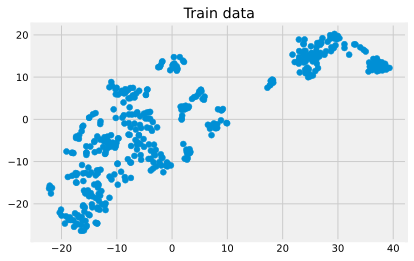

In [211]:
# Строим диаграмму рассеивания для тренировочных признаков после понижения размерности
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('Train data')
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


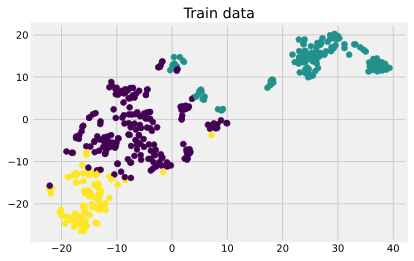

In [257]:
# Разбиваем данные из тренировочного набора на 3 кластера
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.title('Train data')
plt.show()

In [119]:
print('Значения по тренировочному набору: ' + '\n')
# Вычисляем средние значения price в разных кластерах
print(f' Cреднее значение price в кластере 0: {y_train[labels_train == 0].mean()}')
print(f' Cреднее значение price в кластере 1: {y_train[labels_train == 1].mean()}')
print(f' Cреднее значение price в кластере 2: {y_train[labels_train == 2].mean()}' + "\n")

# Вычисляем средние значения CRIM в разных кластерах
print(f' Cреднее значение CRIM в кластере 0: {X_train.loc[labels_train == 0, "CRIM"].mean()}')
print(f' Cреднее значение CRIM в кластере 1: {X_train.loc[labels_train == 1, "CRIM"].mean()}')
print(f' Cреднее значение CRIM в кластере 2: {X_train.loc[labels_train == 2, "CRIM"].mean()}')

Значения по тренировочному набору: 

 Cреднее значение price в кластере 0: 24.958115183246072
 Cреднее значение price в кластере 1: 16.165354330708663
 Cреднее значение price в кластере 2: 27.78837209302326

 Cреднее значение CRIM в кластере 0: 0.42166020942408367
 Cреднее значение CRIM в кластере 1: 10.797028425196853
 Cреднее значение CRIM в кластере 2: 0.07356558139534886


#### Задание 3*
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


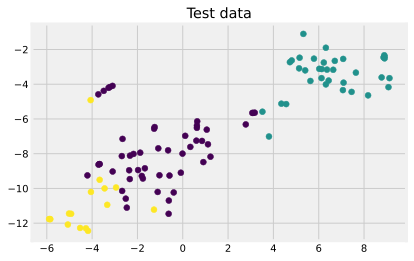

In [258]:
# Применяем модель KMeans, построенную в предыдущем задании, к данным из тестового набора
X_test_tsne = tsne.fit_transform(X_test_scaled)

labels_test = kmeans.predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.title('Test data')
plt.show()

In [260]:
print('Значения по тестовому набору: ' + '\n')
# Вычисляем среднее значение CRIM в кластере 0
print(f' Cреднее значение CRIM в кластере 0: {X_test[labels_test == 0]["CRIM"].mean()}')
# Вычисляем среднее значение CRIM в кластере 1
print(f' Cреднее значение CRIM в кластере 1: {X_test[labels_test == 1]["CRIM"].mean()}')
# Вычисляем среднее значение CRIM в кластере 2
print(f' Cреднее значение CRIM в кластере 2: {X_test[labels_test == 2]["CRIM"].mean()}')

Значения по тестовому набору: 

 Cреднее значение CRIM в кластере 0: 0.26607882352941176
 Cреднее значение CRIM в кластере 1: 10.165531142857143
 Cреднее значение CRIM в кластере 2: 0.062060000000000004


In [261]:
# Вычисляем средние значения price в разных кластерах
print(f' Cреднее значение price в кластере 0: {y_test[labels_test == 0].mean()}')
print(f' Cреднее значение price в кластере 1: {y_test[labels_test == 1].mean()}')
print(f' Cреднее значение price в кластере 2: {y_test[labels_test == 2].mean()}' + "\n")

 Cреднее значение price в кластере 0: 21.860784313725492
 Cреднее значение price в кластере 1: 16.43714285714286
 Cреднее значение price в кластере 2: 31.35



In [262]:
# Строим модель линейной регрессии для каждого кластера, чтобы определить среднее значения цены в каждом кластере
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

print('Значения по тестовому набору: ' + '\n')

# Строим модель для кластера 0
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])
y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

# Строим модель для кластера 1
lr.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])
y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

# Строим модель для кластера 2
lr.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])
y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])

# Вычисляем среднее значение price в кластере 0
print(f' Cреднее значение price в кластере 0: {y_test_pred_0.mean()}')
# Вычисляем среднее значение price в кластере 1
print(f' Cреднее значение price в кластере 1: {y_test_pred_1.mean()}')
# Вычисляем среднее значение price в кластере 1
print(f' Cреднее значение price в кластере 2: {y_test_pred_2.mean()}' + '\n')

Значения по тестовому набору: 

 Cреднее значение price в кластере 0: 21.780610657909772
 Cреднее значение price в кластере 1: 16.045411900111606
 Cреднее значение price в кластере 2: 30.270416086404673

